# Project Name: Amazon Product Data Analysis

# OBJECTIVE: Find out the best selling products and trends in Amazon Products

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
data= pd.read_csv("C:/Users/JAANYA RAHEJA/Downloads/amazon_products.csv")

In [10]:
data2= pd.read_csv("C:/Users/JAANYA RAHEJA/Downloads/amazon_categories.csv")

In [11]:
merged_df = pd.merge(data, data2, left_on='category_id', right_on='id', suffixes=('_data', '_data2'))

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1048575 non-null  object 
 1   title              1048575 non-null  object 
 2   imgUrl             1048575 non-null  object 
 3   productURL         1048575 non-null  object 
 4   stars              1048575 non-null  float64
 5   reviews            1048575 non-null  int64  
 6   price              1048575 non-null  float64
 7   listPrice          1048575 non-null  float64
 8   category_id        1048575 non-null  int64  
 9   isBestSeller       1048575 non-null  bool   
 10  boughtInLastMonth  1048575 non-null  int64  
 11  id                 1048575 non-null  int64  
 12  category_name      1048575 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 105.0+ MB


In [13]:
merged_df.head()
len(merged_df)

1048575

# Data Cleaning

In [14]:
# Drop rows where boughtInLastMonth is 0 within merged_df
merged_df = merged_df[merged_df['boughtInLastMonth'] != 0]

# Confirm the number of rows after dropping
print("Number of rows after dropping:", len(merged_df))


Number of rows after dropping: 384427


In [15]:
# Drop rows wherer reviews is 0 within merged_df
merged_df = merged_df[merged_df['reviews'] != 0]

# Confirm the number of rows after dropping
print("Number of rows after dropping:", len(merged_df))

Number of rows after dropping: 82002


In [16]:
average_bought_in_last_month = merged_df['boughtInLastMonth'].mean()
average_bought_in_last_month

295.955586449111

In [17]:
# Drop rows wherer boughtinlastmonth is less than avg within merged_df
merged_df=merged_df[(merged_df['boughtInLastMonth'] > 350) | (merged_df['isBestSeller']==True)]
# Confirm the number of rows after dropping 
print("Number of rows after dropping:", len(merged_df))

Number of rows after dropping: 15207


In [18]:
# Print the unique category names of best sellers
best_cat =  merged_df[merged_df['isBestSeller']]['category_name'].unique()
for category_name in best_cat:
    print(category_name)


Men's Clothing
Vacuum Cleaners & Floor Care
Televisions & Video Products
Additive Manufacturing Products
Headphones & Earbuds
PlayStation Vita Games, Consoles & Accessories
Wii U Games, Consoles & Accessories
PlayStation 4 Games, Consoles & Accessories
Boys' Watches
Girls' Clothing
Boys' Clothing
Pregnancy & Maternity Products
Shaving & Hair Removal Products
Fabric Decorating
Industrial Materials
Office Electronics
Sports & Outdoor Play Toys
Kids' Play Tractors
Slot Cars, Race Tracks & Accessories
Video Games
Toys & Games
Kids' Furniture
Automotive Tires & Wheels
Wellness & Relaxation Products
Automotive Tools & Equipment
Baby & Toddler Toys
Girls' Jewelry
Luggage
Printmaking Supplies
Women's Handbags
Foot, Hand & Nail Care Products
Home Décor Products
Industrial Hardware
Automotive Exterior Accessories
Skin Care Products
Furniture
Nursery Furniture, Bedding & Décor


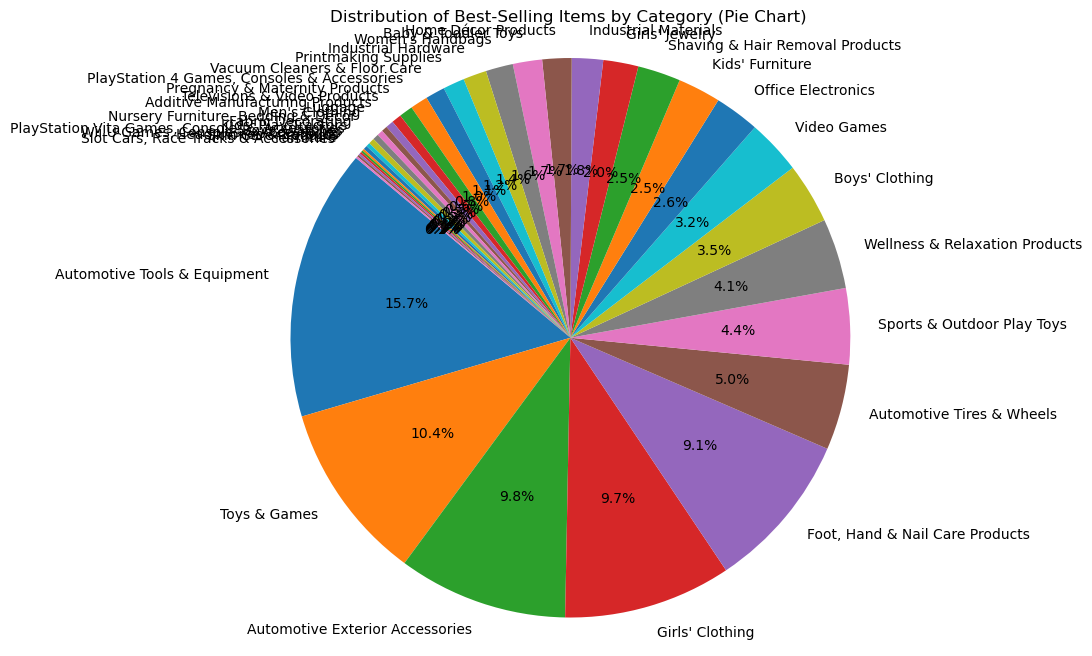

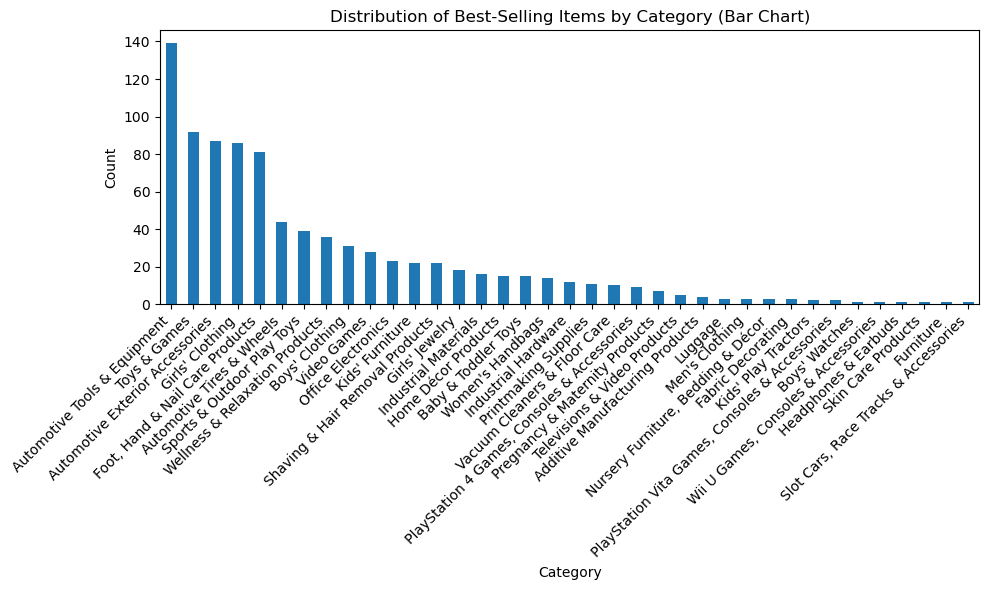

In [19]:
# Count the occurrences of each category
category_counts = merged_df[merged_df['isBestSeller']]['category_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Best-Selling Items by Category (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Best-Selling Items by Category (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


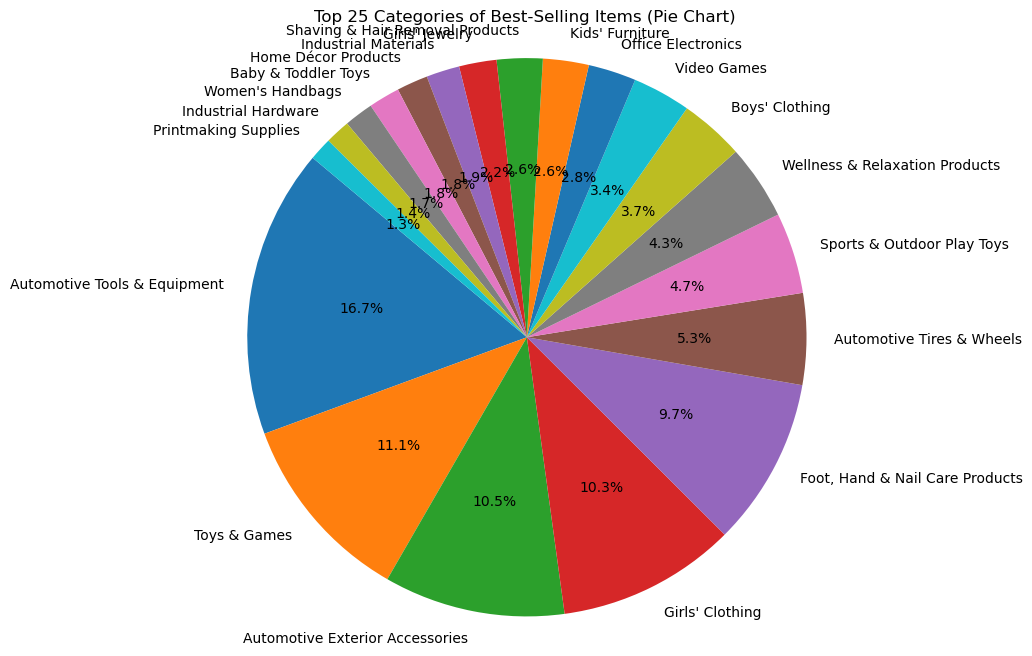

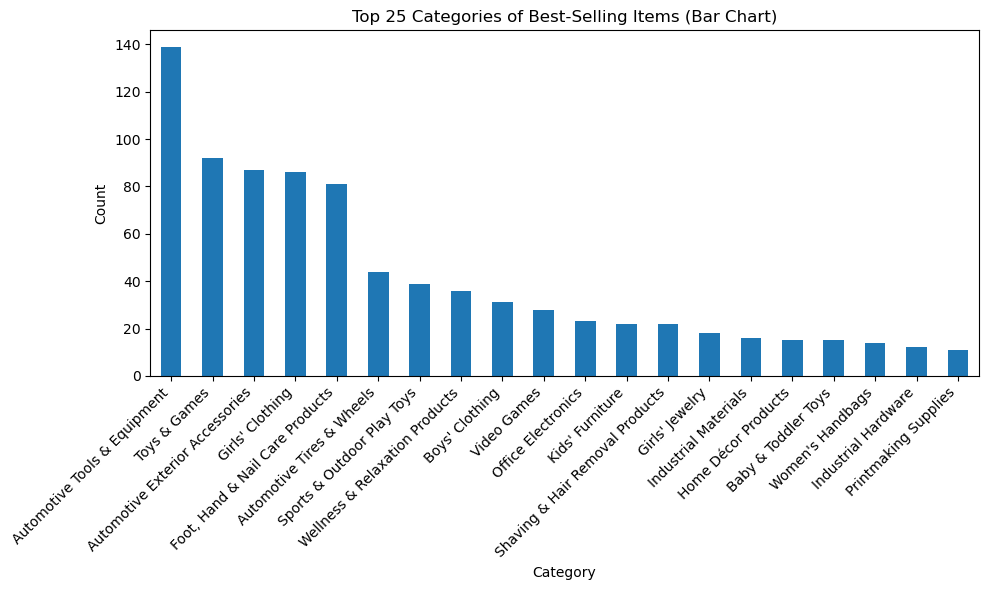

In [20]:
# Count the occurrences of each category
category_counts = merged_df[merged_df['isBestSeller']]['category_name'].value_counts()

# Select the top 25 categories
top_25_categories = category_counts.head(20)

# Create a pie chart for the top 25 categories
plt.figure(figsize=(8, 8))
plt.pie(top_25_categories, labels=top_25_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Categories of Best-Selling Items (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Create a bar chart for the top 25 categories
plt.figure(figsize=(10, 6))
top_25_categories.plot(kind='bar')
plt.title('Top 25 Categories of Best-Selling Items (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


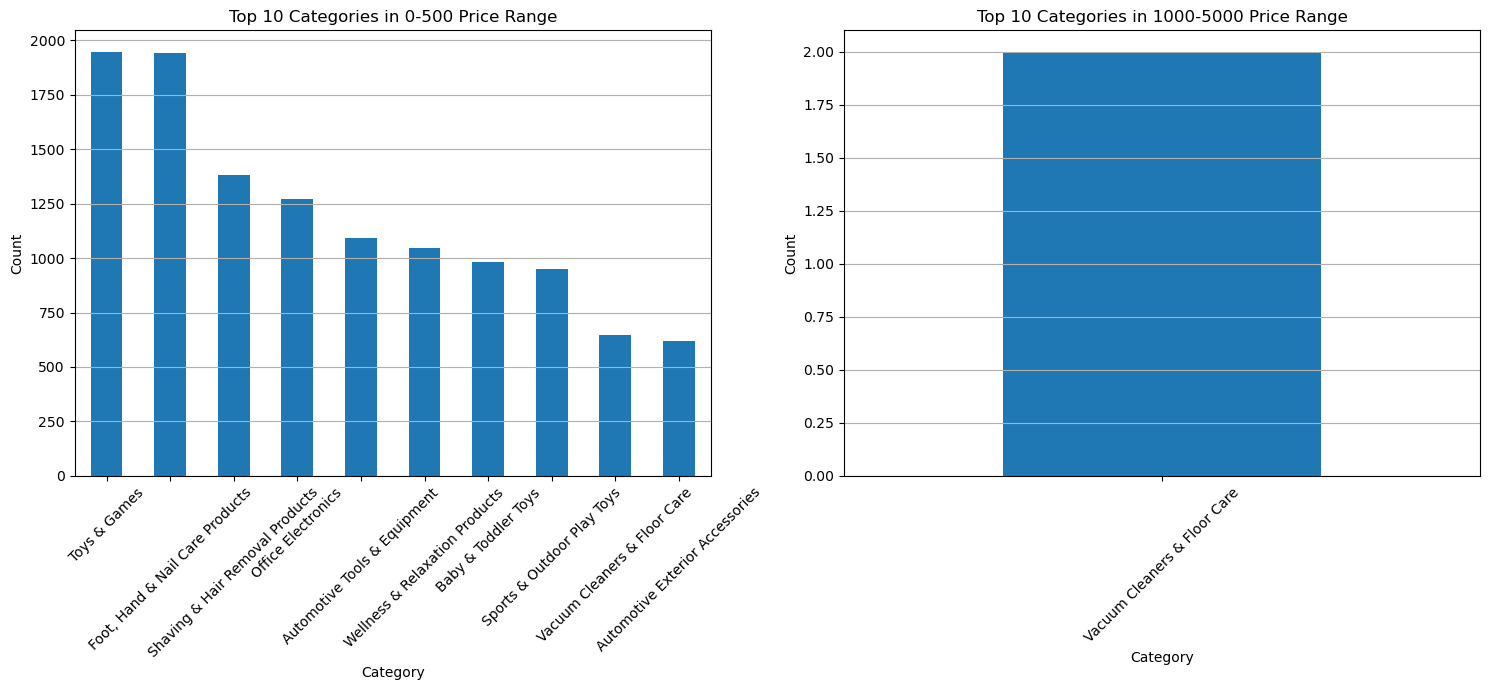

In [21]:
# Define the price ranges
price_ranges = [('0-500', (0, 500)), ('1000-5000', (1000, 5000))]

# Create subplots for each price range
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs = axs.ravel()

# Iterate over each price range
for i, (price_range_label, price_range) in enumerate(price_ranges):
    # Filter the DataFrame by the current price range
    filtered_df = merged_df[(merged_df['price'] >= price_range[0]) & (merged_df['price'] < price_range[1])]
    
    # Count the occurrences of each category in the filtered DataFrame
    category_counts = filtered_df['category_name'].value_counts()
    
    # Select the top 10 categories in the current price range
    top_10_categories = category_counts.head(10)
    
    # Plot a bar chart for the current price range
    top_10_categories.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Top 10 Categories in {price_range_label} Price Range')
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [51]:
# Feature Engineering
# Identify relevant features and encode categorical variables
selected_features = ['stars', 'price', 'listPrice', 'category_name',]
data_encoded = pd.get_dummies(merged_df[selected_features])

In [52]:
# Split the Data into Training and Testing Sets
X = data_encoded  # Features
y = merged_df['isBestSeller']  # Target variable

In [53]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12165, 48)
Shape of X_test: (3042, 48)
Shape of y_train: (12165,)
Shape of y_test: (3042,)


In [54]:
# Feature scaling if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9362261669953977


In [57]:
# Additional evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97      2879
        True       0.27      0.11      0.16       163

    accuracy                           0.94      3042
   macro avg       0.61      0.55      0.56      3042
weighted avg       0.91      0.94      0.92      3042



In [48]:
# def predict_bestseller():
#     stars = float(input("Enter rating (out of 5): "))
#     price = float(input("Enter price: "))
#     listPrice = float(input("Enter list price: "))
                         
#     # Make predictions
#     prediction = model.predict([[stars, price, listPrice]])

#     if prediction[0] == 1:
#         print("This product is predicted to be a bestseller!")
#     else:
#         print("This product is not predicted to be a bestseller.")

        
# # Test the function
# predict_bestseller()


Enter rating (out of 5): 4
Enter price: 345
Enter list price: 234
This product is not predicted to be a bestseller.
